### Zadania

Celem listy jest zbadanie działania metod binaryzacji obrazów w skali szarości i kolorowych. Dążymy do wyobrębnienia obiektów znajdujących się na podanych obrazach, tzn. uzyskania separacji obiektów od tła, a także oddzielenia poszczególnych obiektów. Natomiast samo osiągnięcie "jakiegoś" wyniku ([`cv2.threshold`](https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57) odpalone, próg wybrany "z palca", _coś tam_ wychodzi, wynik wyświetlony) to co najwyżej połowa sukcesu i oceny. Ważne jest przeprowadzenie eksperymentów wyjaśniających dobór parametrów.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

##### Zad. 1: Monety szare

Dane są dwa czarno-białe obrazy monet, `monety_szare` oraz `monety_szare_szum`, z których drugi zawiera pewien poziom zakłóceń. Dokonaj binaryzacji tych obrazów za pomocą progowania.  
Jak wartość progu wpływa na wyniki?  
Jaki wpływ mają zakłócenia w drugim obrazie? Co można wobec nich zrobić?

In [2]:
monety_szare = cv2.imread('../data/Monety_szare.bmp')
monety_szum = cv2.imread('../data/Monety_szare_szum.bmp')

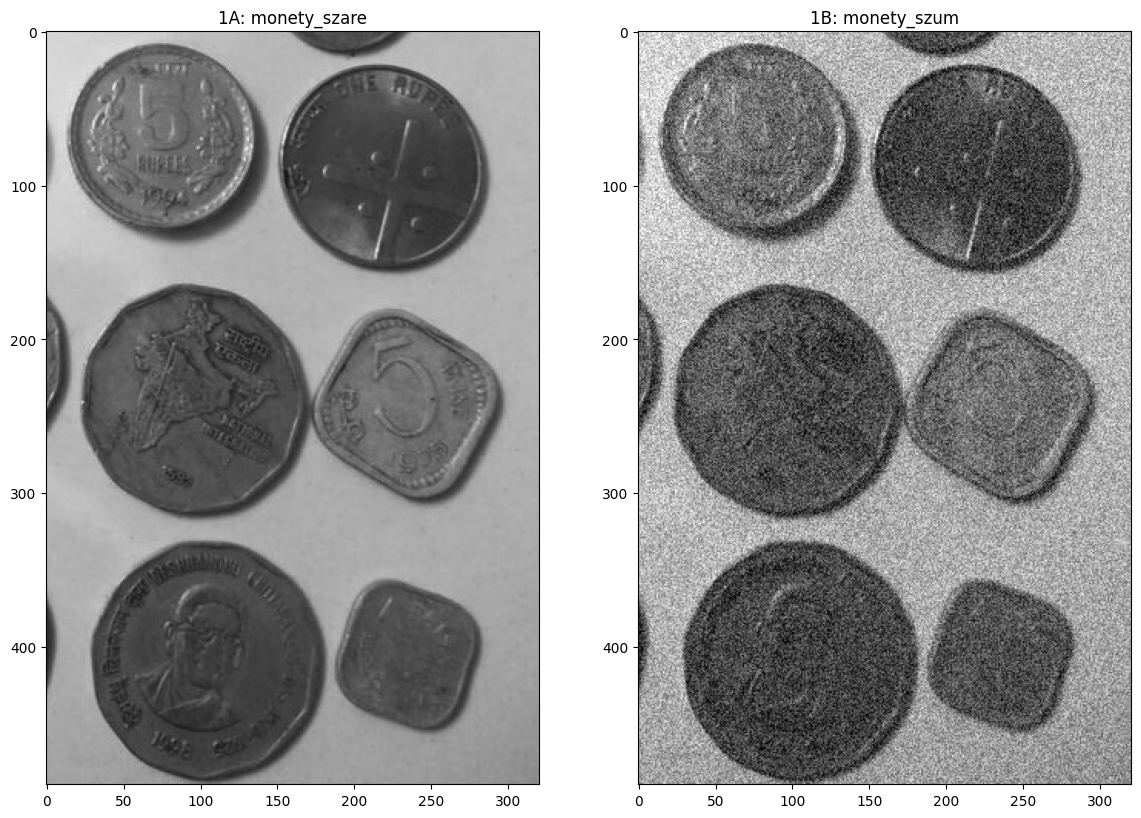

In [3]:
_, (a, b) = plt.subplots(1,2, figsize=(14,10))
a.imshow(monety_szare); a.title.set_text('1A: monety_szare')
b.imshow(monety_szum); b.title.set_text('1B: monety_szum')

Rozwiązanie części 1A:

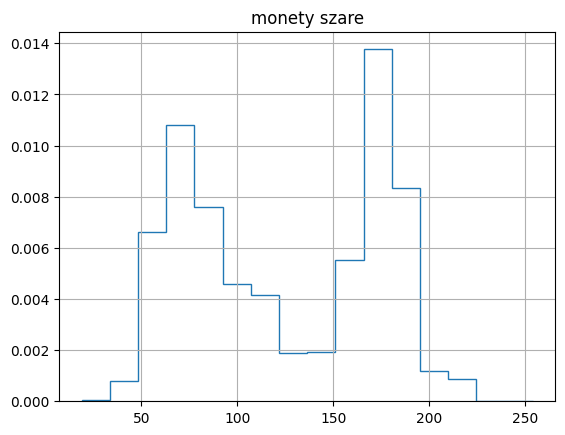

In [4]:
counts, bins = np.histogram(monety_szare.ravel(), bins=16, density=True)
_ = plt.stairs(counts, bins)
plt.grid(True)
_ = plt.title('monety szare')

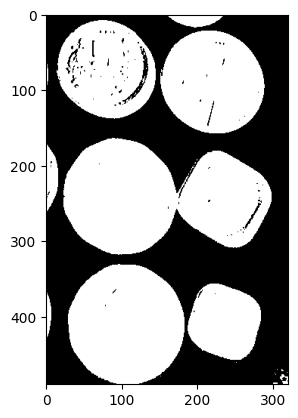

In [5]:
_, output_gray = cv2.threshold(src=monety_szare, thresh=140, maxval=255, type=cv2.THRESH_BINARY_INV)
_ = plt.imshow(output_gray)

Rozwiązanie części 1B:


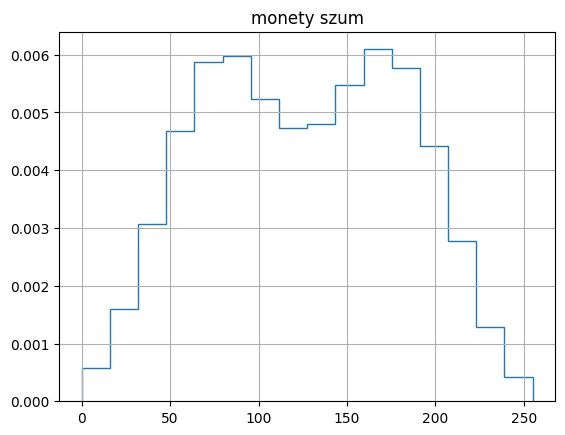

In [6]:
counts, bins = np.histogram(monety_szum.ravel(), bins=16, density=True)
_ = plt.stairs(counts, bins)
plt.grid(True)
_ = plt.title('monety szum')

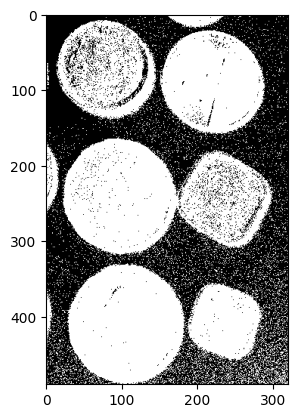

In [7]:
_, output_gray_noisy = cv2.threshold(src=monety_szum, thresh=140, maxval=255, type=cv2.THRESH_BINARY_INV)
_ = plt.imshow(output_gray_noisy)

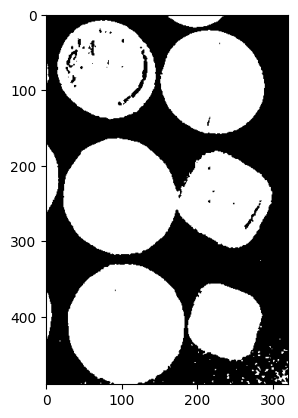

In [8]:
blurred = cv2.GaussianBlur(monety_szum, (5, 5), 0)
_, output_gray_noisy_blurred = cv2.threshold(src=blurred, thresh=140, maxval=255, type=cv2.THRESH_BINARY_INV)
_ = plt.imshow(output_gray_noisy_blurred)

##### Zad. 2: Monety kolorowe

Na podobnej zasadzie dokonaj binaryzacji poniższego obrazu kolorowego.  
Skorzystaj z modelu barw HSV. Uzasadnij dobór kanału oraz progu binaryzacji.

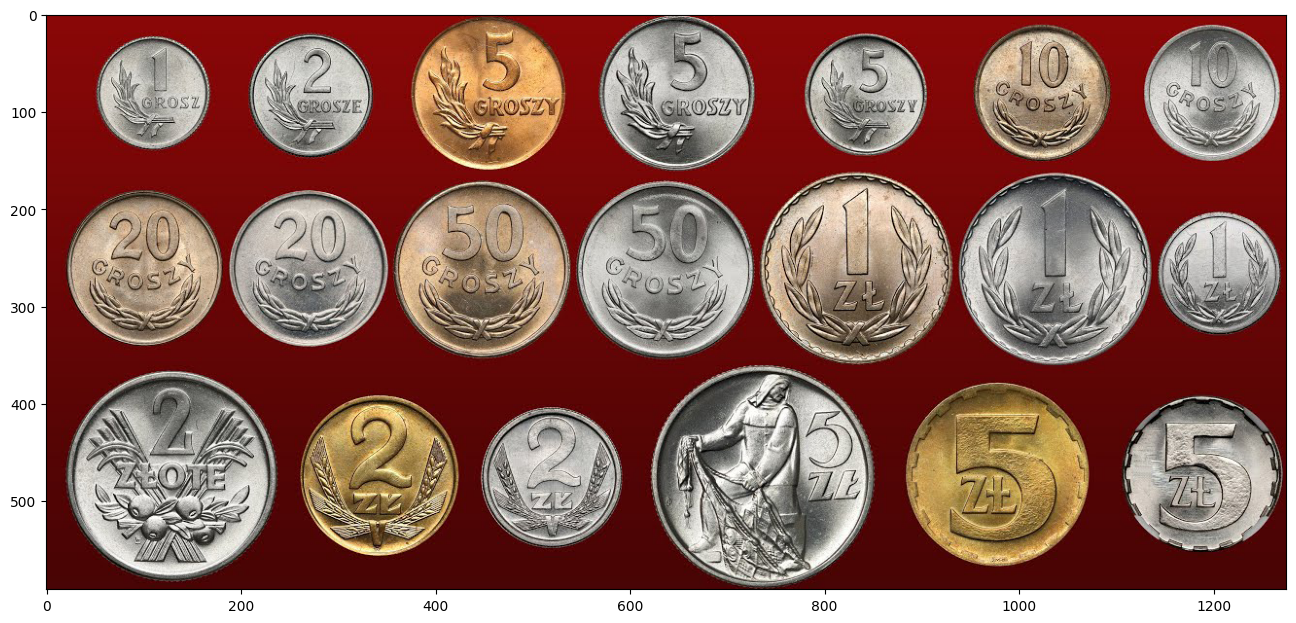

In [9]:
monety_kolor = cv2.imread('../data/Monety_kolor.bmp')
plt.subplots(1,1,figsize=(16,8))[1].imshow(monety_kolor[..., ::-1]);

In [10]:
coins_hsv = cv2.cvtColor(monety_kolor, cv2.COLOR_BGR2HSV)

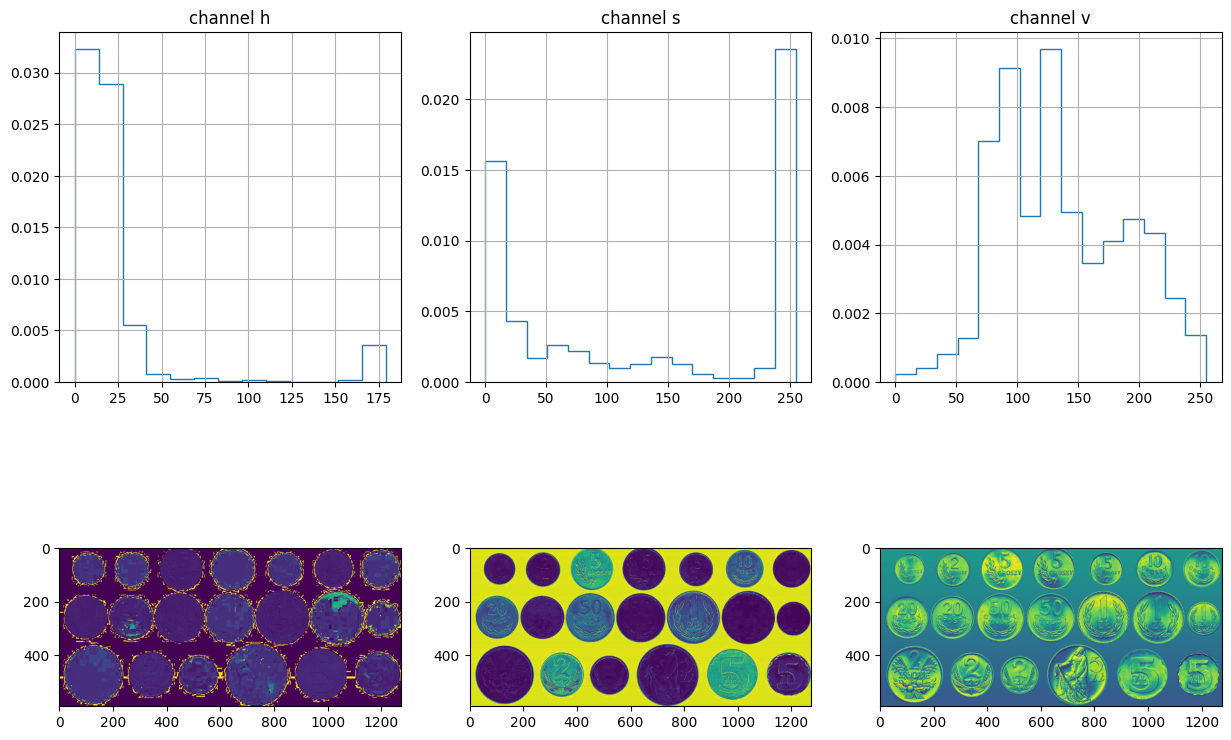

In [11]:
channels = {0: 'h', 1: 's', 2: 'v'}
_, subplots = plt.subplots(2, 3, figsize=(15, 10))
for i, j in channels.items():
    flat = coins_hsv[:, :, i].flatten()
    counts, bins = np.histogram(flat, bins=int(np.sqrt(flat.max())), density=True)
    subplots[0, i].stairs(counts, bins)
    subplots[0, i].grid(True); subplots[0, i].title.set_text('channel {}'.format(j))

    subplots[1, i].imshow(coins_hsv[:, :, i])

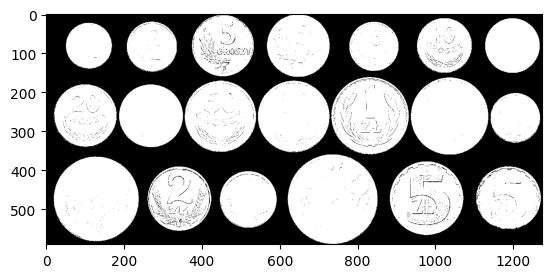

In [12]:
_, output_gray_hsv = cv2.threshold(coins_hsv[:, :, 1], 200, 255, cv2.THRESH_BINARY_INV)
_ = plt.imshow(output_gray_hsv, cmap='gray')

Przetestuj opracowany powyżej algorytm na poniższym obrazie z wyraźnym zaszumieniem. Co się zmienia i dlaczego? Co można poprawić?

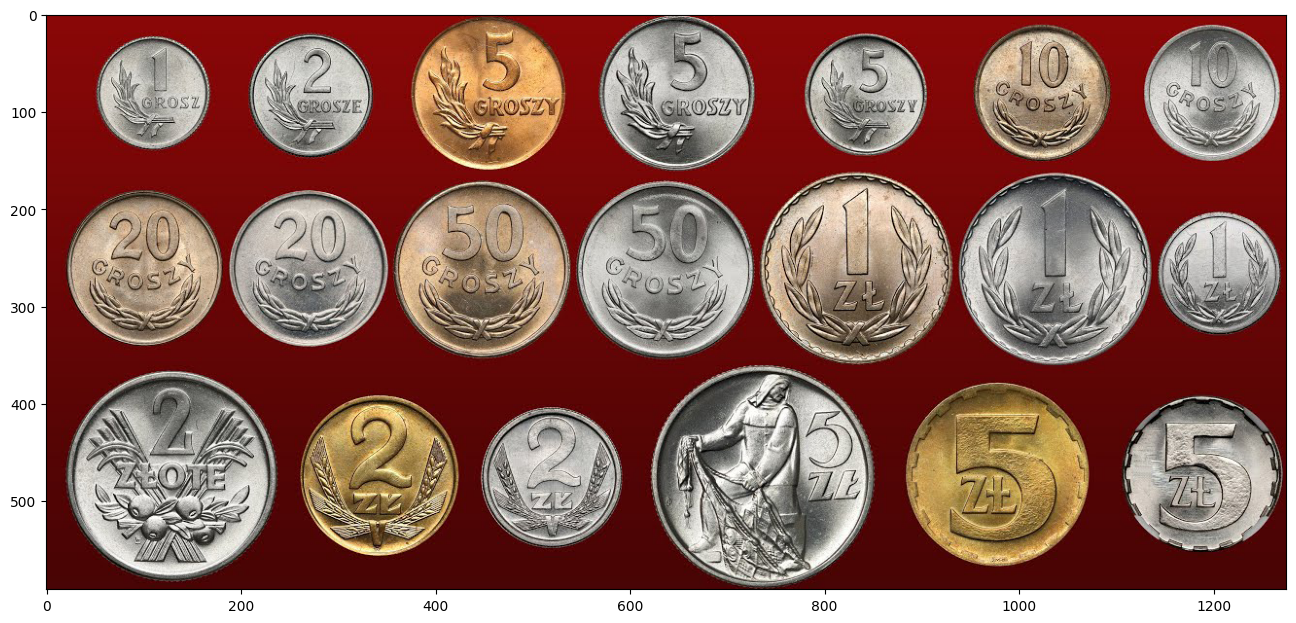

In [13]:
monety_kolor_szum = cv2.imread('../data/Monety_kolor_szum.bmp')
plt.subplots(1,1,figsize=(16,8))[1].imshow(monety_kolor[..., ::-1]);

In [14]:
coins_hsv_noisy = cv2.cvtColor(monety_kolor_szum, cv2.COLOR_BGR2HSV)

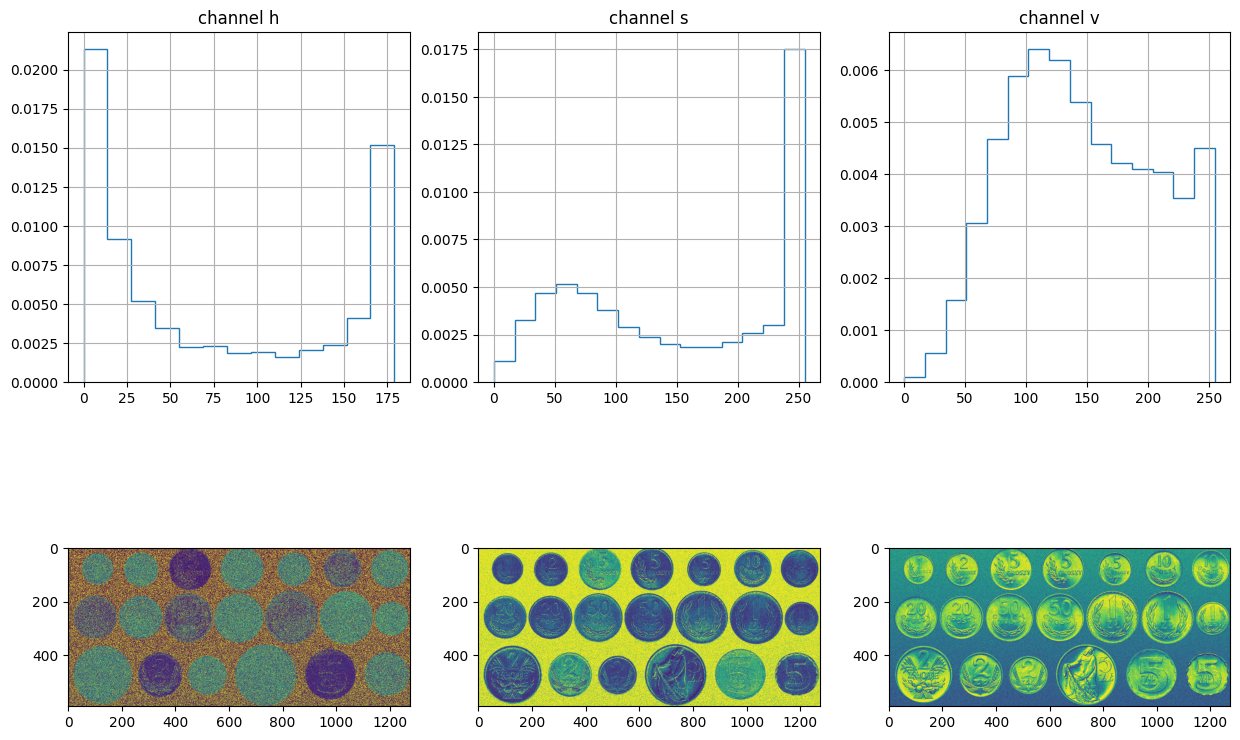

In [15]:
channels = {0: 'h', 1: 's', 2: 'v'}
_, subplots = plt.subplots(2, 3, figsize=(15, 10))
for i, j in channels.items():
    flat = coins_hsv_noisy[:, :, i].flatten()
    counts, bins = np.histogram(flat, bins=int(np.sqrt(flat.max())), density=True)
    subplots[0, i].stairs(counts, bins)
    subplots[0, i].grid(True); subplots[0, i].title.set_text('channel {}'.format(j))

    subplots[1, i].imshow(coins_hsv_noisy[:, :, i])

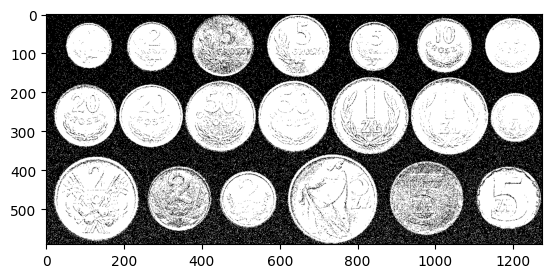

In [16]:
_, output_gray_hsv_noisy = cv2.threshold(coins_hsv_noisy[:, :, 1], 180, 255, cv2.THRESH_BINARY_INV)
_ = plt.imshow(output_gray_hsv_noisy, cmap='gray')

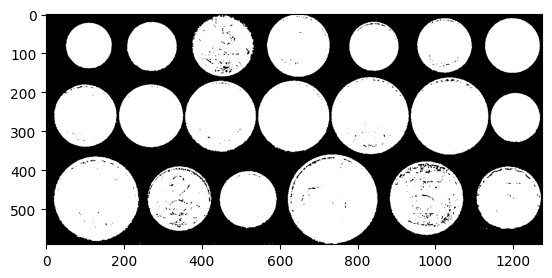

In [17]:
blurred_hsv = cv2.GaussianBlur(coins_hsv_noisy[:, :, 1], (5, 5), 0)
_, output_gray_hsv_noisy = cv2.threshold(blurred_hsv, 180, 255, cv2.THRESH_BINARY_INV)
_ = plt.imshow(output_gray_hsv_noisy, cmap='gray')

##### Zad. 3: Tekst

W tym przypadku należy wyodrębnić litery od bardzo nierównomiernie oświetlonego tła. Skorzystaj z binaryzacji metodą Otsu. Zastosuj binaryzację w sposób lokalny (oknem przesuwnym). Jaki wpływ ma rozmiar okna na jakość binaryzacji? Jak przesuwać okno?

_(Pełna punktacja za zadanie wymaga własnoręcznej implementacji okna przesuwnego i filtracji wewnątrz niego. Użycie zamiast tego_ `cv2.adaptiveThreshold` _liczone będzie jako pół zadania, ale jedynie po demonstracji zrozumienia tej metody.)_

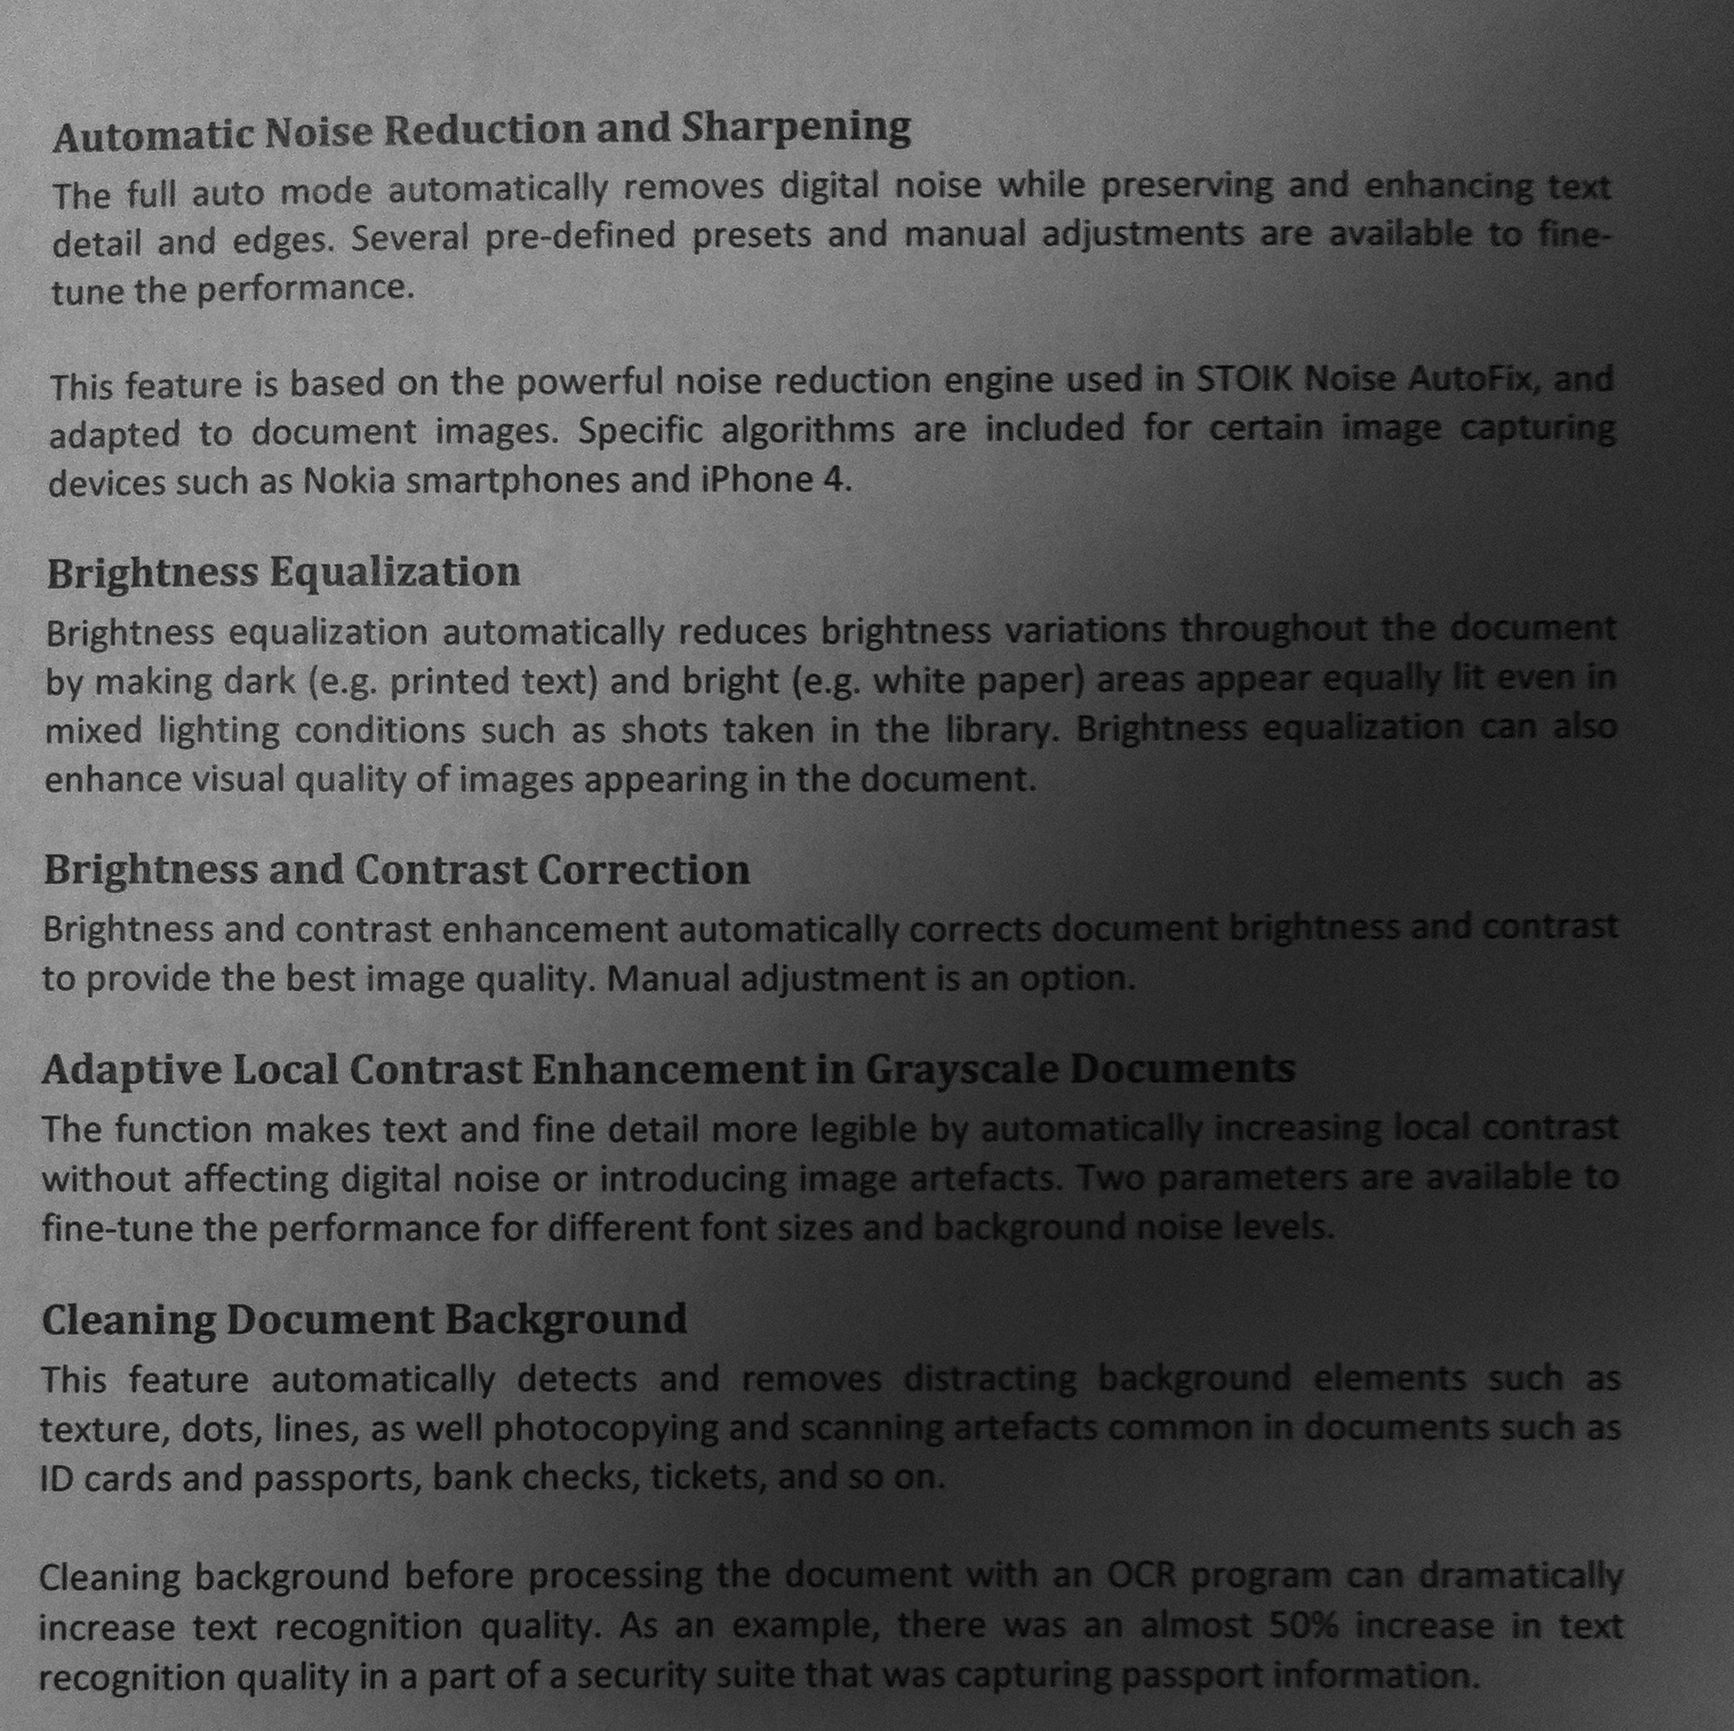

In [18]:
tekst = cv2.imread('../data/Tekst1.bmp')
Image.fromarray(cv2.cvtColor(tekst, cv2.COLOR_BGR2GRAY))

In [19]:
from utils.otsu import local_otsu

In [20]:
text_gray = cv2.cvtColor(tekst, cv2.COLOR_BGR2GRAY)

In [21]:
binarized_text = local_otsu(text_gray, window_size=213, light=0, dark=255)

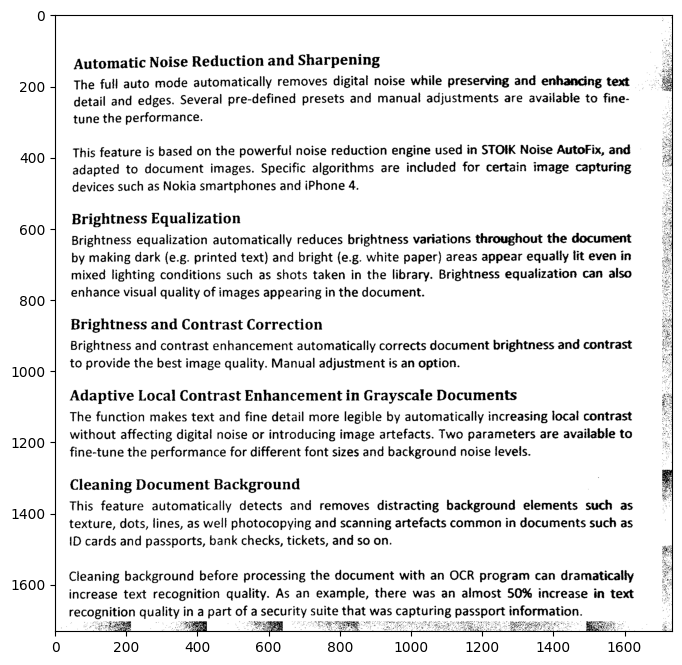

In [22]:
plt.figure(figsize=(16, 8))
_ = plt.imshow(binarized_text, cmap='gray')